--Data Diri--

Nama: Rahmatun Azizah

Email: rahmatunazizah@gmail.com

Domisili: Kabupaten Pesisir Barat

In [1]:
# Memastikan versi TensorFlow
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Mempersiapkan data
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
      -O /tmp/rockpaperscissors.zip

--2020-10-26 23:22:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  33.1MB/s    in 10s     

2020-10-26 23:22:54 (29.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Melakukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Mendefinisikan direktori
import os, shutil
base_dir = '/tmp/rockpaperscissors/'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

# Direktori training dan validasi
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Direktori rock, paper dan scissors
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [5]:
# Memastikan datanya sudah terunduh
import os

os.listdir(base_dir)

['paper', 'scissors', 'rock']

In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
from sklearn.model_selection import train_test_split
 
# Membagi dataset menjadi training dan validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [8]:
# Membuat direktori data training 
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# Membuat direktori data validasi
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [9]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [10]:
# Menyalin data ke direktori
for i in train_rock_dir :
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock,i))

for i in train_paper_dir :
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper,i))

for i in train_scissors_dir :
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors,i))

for i in val_rock_dir :
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))

for i in val_paper_dir :
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper,i))

for i in val_scissors_dir :
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors,i))

In [11]:
# Menampilkan proses augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
#  Menggunakan objek image data generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Direktori data training
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 pixel
        batch_size=32,
        class_mode='categorical') # Menggunakan mode class 'categorical' karena merupakan masalah klasifikasi 3 kelas
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # Direktori data validasi
        target_size=(150, 150), # Mengubah resolusi seluruh gambar menjadi 150x150 pixel
        batch_size=32,
        class_mode='categorical') # Menggunakan mode class 'categorical' karena merupakan masalah klasifikasi 3 kelas

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# Membangun arsitektur sebuah CNN menggunakan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') 
    # menggunakan fungsi aktivasi softmax karena dataset memiliki 3 kelas
])

In [14]:
# Meng-compile model dengan 'Adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
# Melatih model dengan menggunakan metode fit
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,  
      verbose=2)

Epoch 1/20
25/25 - 44s - loss: 1.0695 - accuracy: 0.4762 - val_loss: 0.9651 - val_accuracy: 0.4875
Epoch 2/20
25/25 - 43s - loss: 0.6377 - accuracy: 0.7550 - val_loss: 0.4230 - val_accuracy: 0.8313
Epoch 3/20
25/25 - 43s - loss: 0.3593 - accuracy: 0.8700 - val_loss: 0.3530 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 43s - loss: 0.2258 - accuracy: 0.9325 - val_loss: 0.2344 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 43s - loss: 0.2008 - accuracy: 0.9300 - val_loss: 0.1474 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 43s - loss: 0.1857 - accuracy: 0.9350 - val_loss: 0.2006 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 43s - loss: 0.2210 - accuracy: 0.9312 - val_loss: 0.2371 - val_accuracy: 0.9125
Epoch 8/20
25/25 - 44s - loss: 0.1398 - accuracy: 0.9488 - val_loss: 0.2536 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 43s - loss: 0.1574 - accuracy: 0.9425 - val_loss: 0.2037 - val_accuracy: 0.9125
Epoch 10/20
25/25 - 47s - loss: 0.0997 - accuracy: 0.9762 - val_loss: 0.1607 - val_accuracy: 0.9438
Epoch 11/

Saving IMG-5647.jpg to IMG-5647.jpg
IMG-5647.jpg
Paper


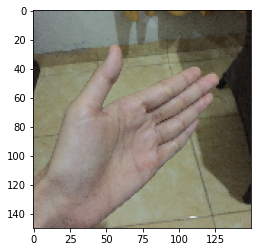

In [17]:
# Melakukan resize pada gambar yang dipilih dan mengubahnya menjadi larik numpy
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
file_uploaded = files.upload()
 
# Memprediksi gambar
for file_name in file_uploaded.keys():

    path = file_name
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    picture = np.vstack([x])
    classes = model.predict(picture, batch_size=10)
    print(file_name)
    if classes[0][0]==1:
      print('Paper')
    elif classes[0][1]==1:
      print('Rock')
    elif classes[0][2]==1:
      print('Scissors')